<a href="https://colab.research.google.com/github/jeremiaspabon/taller1_DL/blob/main/01_exploracion_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

----

# __Deep Learning__ <br><br>

### **Integrantes Grupo :**
Gerson Julían Rincón [grinconp2@ucentral.edu.co](grinconp2@ucentral.edu.co)<br>
Jeremías Pabón [jpabonl@ucentral.edu.co](jpabonl@ucentral.edu.co)<br>
Andrés Bravo [abravop@ucentral.edu.co](abravop@ucentral.edu.co)<br>
Carolina Tobaría [ctobariac@ucentral.edu.co](ctobariac@ucentral.edu.co)<br>

### **Profesor:**
William David Prada Buitrago [wpradab@ucentral.edu.co]<br>
Facultad de Ingeniería y Ciencias Básicas <br>
Maestría en Analitica de Datos <br>
### **Universidad Central**


In [121]:
import sys
import os
import pandas as pd

file_path = "C:/Users/USER/Downloads/House_Rent_Dataset.csv"

if not file_path:
    print("No se seleccionó ningún archivo. Saliendo...")

print(f"Archivo seleccionado: {file_path}")

    # Cargar el archivo
if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
elif file_path.endswith('.xlsx'):
    df = pd.read_excel(file_path)
else:
    raise ValueError("Formato de archivo no soportado. Usa .csv o .xlsx")

Archivo seleccionado: C:/Users/USER/Downloads/House_Rent_Dataset.csv


> LIBRERIAS


Las librerias a utilizar son las siguientes:

In [122]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Visualización de los primeros datos en la data.

In [123]:
# Imprimir el DataFrame
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


##**TRATAMIENTO DE VALORES FALTANTES**

In [125]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

No existen valores faltantes

##**VALORES DUPLICADOS**

In [126]:
cantidad_total_duplicados = df.duplicated().sum()
print(f"Número total de filas duplicadas: {cantidad_total_duplicados}")

Número total de filas duplicadas: 0


No se encontraron datos duplicados en ninguna de las columnas del conjunto de datos.

## **RENOMBRAR  VARIABLES**

In [127]:
import pandas as pd

# Definir el mapeo de nombres
nombres_nuevos = {
    'BHK': 'habitaciones',
    'Rent': 'renta',
    'Size': 'tamaño',
    'Floor': 'piso',
    'Area Type': 'tipo_area',
    'Area Locality': 'localidad',
    'City': 'ciudad',
    'Furnishing Status': 'estado_amueblado',
    'Tenant Preferred': 'inquilino_preferido',
    'Bathroom': 'baños',
    'Point of Contact': 'contacto',
    'Posted On':'fecha_publicacion'
}

# Renombrar las columnas
df = df.rename(columns=nombres_nuevos)



In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fecha_publicacion    4746 non-null   object
 1   habitaciones         4746 non-null   int64 
 2   renta                4746 non-null   int64 
 3   tamaño               4746 non-null   int64 
 4   piso                 4746 non-null   object
 5   tipo_area            4746 non-null   object
 6   localidad            4746 non-null   object
 7   ciudad               4746 non-null   object
 8   estado_amueblado     4746 non-null   object
 9   inquilino_preferido  4746 non-null   object
 10  baños                4746 non-null   int64 
 11  contacto             4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [129]:
# Convertir las variables numéricas
variables_numericas = ['renta', 'habitaciones', 'baños', 'tamaño']
df[variables_numericas] = df[variables_numericas].apply(pd.to_numeric, errors='coerce')



### **Descripción de cada variable**

| Variable en español | Nombre original en inglés | Descripción |
|--------------------|------------------------|-------------|
| **habitaciones** | BHK | Número de habitaciones, sala y cocina. |
| **renta** | Rent | Precio de alquiler de la propiedad. |
| **tamaño** | Size | Tamaño de la propiedad en pies cuadrados. |
| **piso** | Floor | Piso en el que está ubicada la propiedad y número total de pisos del edificio. |
| **tipo_area** | Area Type | Tipo de área utilizada en el cálculo del tamaño (Superficie, Área de Alfombra o Área Construida). |
| **localidad** | Area Locality | Localidad donde está ubicada la propiedad. |
| **ciudad** | City | Ciudad donde se encuentra la propiedad. |
| **estado_amueblado** | Furnishing Status | Estado de amueblado de la propiedad: Amueblado, Semiamueblado o Sin amueblar. |
| **inquilino_preferido** | Tenant Preferred | Tipo de inquilino preferido por el dueño o agente. |
| **baños** | Bathroom | Número de baños en la propiedad. |
| **contacto** | Point of Contact | Persona o entidad a la que se debe contactar para más información sobre la propiedad. |
| **fecha_publicacion** | Posted On | Fecha en la que la propiedad fue publicada en la plataforma. |

- ---

## **RESUMEN ESTADÍSTICO DE LAS VARIABLES CUALITATIVAS**


In [130]:
# Diccionario con DataFrames.
Listadataframes = {
    'Prediccion_Precio_Alquiler': df}

In [131]:
def descripcion_categorica(diccionario):
    '''
    Función para describir las variables categóricas de múltiples tablas en un diccionario.

    Parameters:
    - diccionario: Un diccionario donde las claves son nombres de tablas y los valores son DataFrames de Pandas.

    Returns:
    - Un DataFrame que contiene la descripción de las variables numéricas para todas las tablas.
    '''
    categorical_description = []

    for tabla_nombre, tabla_datos in diccionario.items():
        # print(f"Tabla: {tabla_nombre}")
        for col in tabla_datos.columns:
            if tabla_datos[col].dtype == 'O':  # 'O' representa el tipo object (categórico)
                s = tabla_datos[col]
                mode = s.mode()
                categorical_description.append({
                    'Tabla': tabla_nombre,
                    'Índice': col,
                    'Nombre': col,
                    'No Nulos': s.notnull().sum(),
                    'Valores Únicos': s.nunique(),
                    'Moda': mode[0] if not mode.empty else None,
                    'Frecuencia de Moda': s.value_counts().iloc[0] if not mode.empty else None
                })

    descripcion_df = pd.DataFrame(categorical_description)
    return descripcion_df

In [132]:
descripcion_categorica(Listadataframes)

,Tabla,Índice,Nombre,No Nulos,Valores Únicos,Moda,Frecuencia de Moda
0,Prediccion_Precio_Alquiler,fecha_publicacion,fecha_publicacion,4746,81,2022-07-06,311
1,Prediccion_Precio_Alquiler,piso,piso,4746,480,1 out of 2,379
2,Prediccion_Precio_Alquiler,tipo_area,tipo_area,4746,3,Super Area,2446
3,Prediccion_Precio_Alquiler,localidad,localidad,4746,2235,Bandra West,37
4,Prediccion_Precio_Alquiler,ciudad,ciudad,4746,6,Mumbai,972
5,Prediccion_Precio_Alquiler,estado_amueblado,estado_amueblado,4746,3,Semi-Furnished,2251
6,Prediccion_Precio_Alquiler,inquilino_preferido,inquilino_preferido,4746,3,Bachelors/Family,3444
7,Prediccion_Precio_Alquiler,contacto,contacto,4746,3,Contact Owner,3216


 0   fecha_publicacion    4746 non-null   object
 1   habitaciones         4746 non-null   int64
 2   renta                4746 non-null   int64
 3   tamaño               4746 non-null   int64
 4   piso                 4746 non-null   object
 5   tipo_area            4746 non-null   object
 6   localidad            4746 non-null   object
 7   ciudad               4746 non-null   object
 8   estado_amueblado     4746 non-null   object
 9   inquilino_preferido  4746 non-null   object
 10  baños                4746 non-null   int64
 11  contacto             4746 non-null   object

**Grafico para cada variable cualitativa**

In [133]:
# Lista de variables a excluir
variables_excluir = ["fecha_publicacion", "estado_amueblado", "localidad","inquilino_preferido"]

# Crear una nueva versión del DataFrame excluyendo las variables especificadas
df_sin_variables = df.drop(variables_excluir, axis=1)


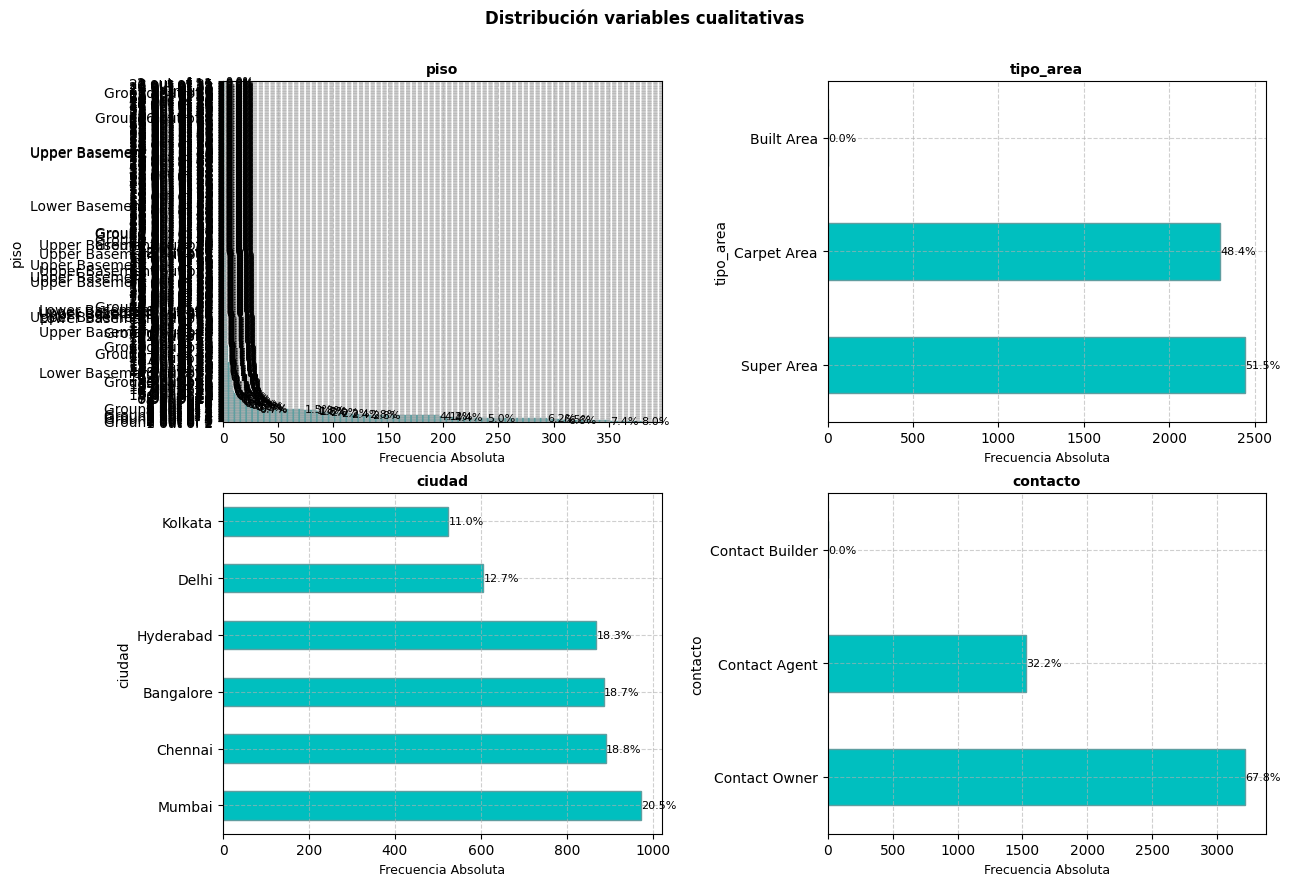

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 9))
axes = axes.flat
columnas_object = df_sin_variables.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    counts = df_sin_variables[colum].value_counts()
    total = counts.sum()
    percentages = (counts / total) * 100

    # Crear el gráfico con las frecuencias relativas
    ax = axes[i]
    counts.plot.barh(ax=ax, color='#00BFBF', edgecolor='#5F9EA0')
    ax.set_title(colum, fontsize=10, fontweight="bold")  # Aumentar el tamaño del título
    ax.tick_params(labelsize=10)  # Aumentar el tamaño de las etiquetas de los ejes
    ax.set_xlabel("Frecuencia Absoluta", fontsize=9)  # Aumentar el tamaño del texto del eje x

    # Agregar etiquetas de porcentaje a las barras
    for j, count in enumerate(counts):
        ax.text(count + 1, j, f'{percentages[j]:.1f}%', va='center', fontsize=8)

    # Agregar una cuadrícula de fondo
    ax.grid(True, linestyle='--', alpha=0.6)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas', fontsize=12, fontweight="bold")  # Aumentar el tamaño del título principal

plt.show()

**Análisis del grafico de las variables Cualitativa**

--------------------------------------------------

# **RESUMEN ESTADÍSTICO DE LAS VARIABLES CUANTITATIVAS**

In [135]:
import pandas as pd

# Calcular el coeficiente de variación (CV)
cv = (df.select_dtypes(include=['float64', 'int']).std() / df.select_dtypes(include=['float64', 'int']).mean()).rename('coef_var')

# Descripción de los datos
description = df.select_dtypes(include=['float64', 'int']).describe()
description = description.rename(index={'count': 'conteo', 'mean': 'promedio', 'std': 'desviación', 'min':'mínimo', 'max': 'máximo'})
#description = description.append(cv)
description.round(2)

,habitaciones,renta,tamaño,baños
conteo,4746.00,4746.00,4746.00,4746.00
promedio,2.08,34993.45,967.49,1.97
desviación,0.83,78106.41,634.20,0.88
mínimo,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
máximo,6.00,3500000.00,8000.00,10.00


**Análisis de la tabla resumen**

--------------------------------------------------

**Análisis de Distribuciones con Histogramas**

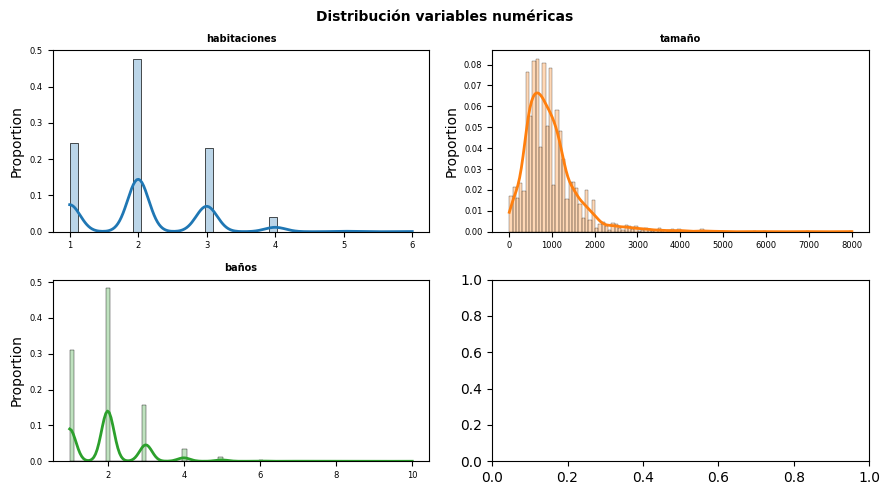

In [136]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('renta')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df,
        x        = colum,
        #fill    = True,
        stat     = "proportion",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

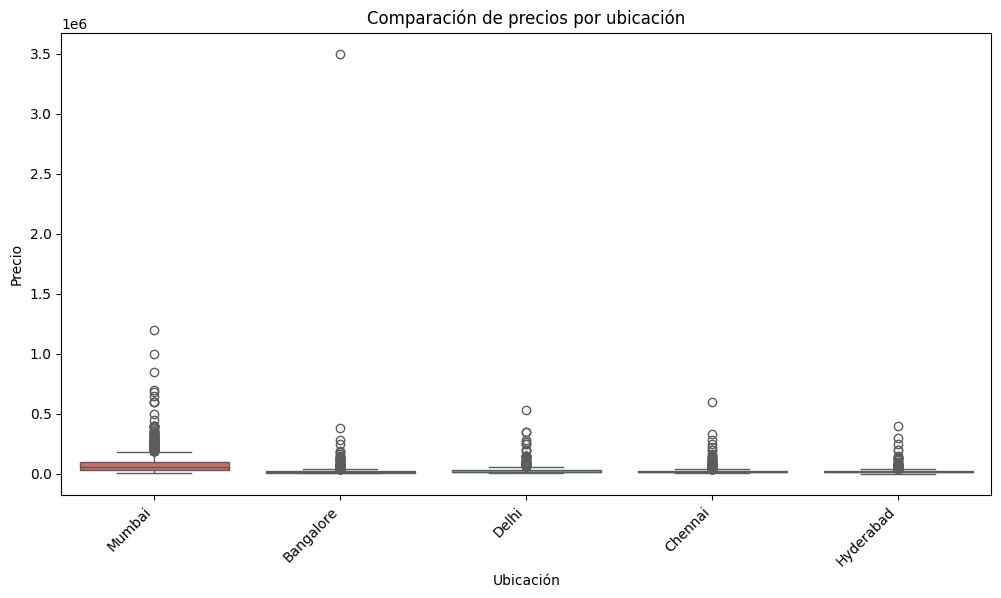

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la frecuencia de cada ubicación
frecuencia_ubicacion = df['ciudad'].value_counts()

# Seleccionar las ubicaciones más frecuentes (por ejemplo, las 10 más comunes)
ubicaciones_mas_frecuentes = frecuencia_ubicacion.head(5).index

# Filtrar el DataFrame para incluir solo las ubicaciones más frecuentes
df_filtrado = df[df['ciudad'].isin(ubicaciones_mas_frecuentes)]

# Configurar tamaño de la figura
plt.figure(figsize=(12, 6))

# Definir una paleta de colores
palette = sns.color_palette("hls",len(ubicaciones_mas_frecuentes))

# Graficar un boxplot de los precios por ubicación con colores diferentes
sns.boxplot(data=df_filtrado, x='ciudad', y='renta', palette=palette)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir título y etiquetas a los ejes
plt.title('Comparación de precios por ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()


##**VALORES ATÍPICOS**

In [138]:
# Diccionario con DataFrames.
Listadataframes = {
    'Prediccion_Precio_Alquile': df}

In [139]:
def describe_numeric_variables(diccionario):
    '''
    Función para describir las variables numéricas de múltiples tablas en un diccionario.

    Parameters:
    - diccionario: Un diccionario donde las claves son nombres de tablas y los valores son DataFrames de Pandas.

    Returns:
    - Un DataFrame que contiene la descripción de las variables numéricas para todas las tablas.
    '''
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    numeric_description = []

    for tabla_nombre, tabla_dataframe in diccionario.items():
        for col in tabla_dataframe.select_dtypes(include='number').columns:
            s = tabla_dataframe[col]
            numeric_description.append({
                'Tabla': tabla_nombre,
                'Índice': col,
                'Nombre': col,
                'Tipo de Dato': s.dtype,
                'Máximo': s.max(),
                'Mínimo': s.min(),
                'Mediana': s.median(),
                'Media': s.mean(),
                'Desviación Estándar': s.std(),
                'No Nulos': s.notnull().sum(),
                'Valores Únicos': s.nunique(),
                'Moda': s.mode()[0] if not s.mode().empty else None,
                'Frecuencia_Moda': s.value_counts(dropna=True).iloc[0] if not s.mode().empty else np.NaN
            })

    numeric_df = pd.DataFrame(numeric_description)
    return numeric_df

In [140]:
describe_numeric_variables(Listadataframes)

,Tabla,Índice,Nombre,Tipo de Dato,Máximo,Mínimo,Mediana,Media,Desviación Estándar,No Nulos,Valores Únicos,Moda,Frecuencia_Moda
0,Prediccion_Precio_Alquile,habitaciones,habitaciones,int64,6,1,2.00,2.08,0.83,4746,6,2,2265
1,Prediccion_Precio_Alquile,renta,renta,int64,3500000,1200,16000.00,34993.45,78106.41,4746,243,15000,275
2,Prediccion_Precio_Alquile,tamaño,tamaño,int64,8000,10,850.00,967.49,634.20,4746,615,1000,240
3,Prediccion_Precio_Alquile,baños,baños,int64,10,1,2.00,1.97,0.88,4746,8,2,2291


In [141]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import random

def generate_boxplots(df):

    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    if not numeric_cols:
        print("No se encontraron columnas numéricas en el DataFrame.")
        return


    colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(numeric_cols))]


    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols


    fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=numeric_cols)

    for i, (col_name, color) in enumerate(zip(numeric_cols, colors)):
        row = i // n_cols + 1
        col = i % n_cols + 1


        trace = go.Box(y=df[col_name], marker=dict(color=color))
        fig.add_trace(trace, row=row, col=col)

    fig.update_layout(height=300 * n_rows, width=600 * n_cols, title_text="Diagramas de Cajas")

    fig.show()

In [142]:
import plotly.io as pio
pio.renderers.default = "browser"
#pio.renderers.default = "notebook"
generate_boxplots(df)

**Variable area**



In [143]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Violin(x=df['tamaño'], line_color='lightseagreen', name='tamaño', y0=0))
fig.update_traces(orientation='h', side='positive', meanline_visible=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False, width=960, height=400, plot_bgcolor='white',title="Gráfico de Violín para la Variable 'tamaño'")
fig.show()

In [144]:
df['tamaño'].describe(percentiles=[0.70,0.80,0.85,0.9,0.95]).to_frame().T

,count,mean,std,min,50%,70%,80%,85%,90%,95%,max
tamaño,4746.00,967.49,634.20,10.00,850.00,1100.00,1300.00,1500.00,1700.00,2000.00,8000.00


# RENTA

In [145]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Violin(x=df['renta'], line_color='yellowgreen', name='precio', y0=0))
fig.update_traces(orientation='h', side='positive', meanline_visible=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False, width=960, height=400, plot_bgcolor='white',title="Gráfico de Violín para la Variable 'precio'")
fig.show()

In [146]:
df['renta'].describe(percentiles=[0.70,0.80,0.85,0.9,0.95]).to_frame().T

,count,mean,std,min,50%,70%,80%,85%,90%,95%,max
renta,4746.00,34993.45,78106.41,1200.00,16000.00,27000.00,40000.00,52000.00,72000.00,130000.00,3500000.00


In [147]:
df_filter = df[(df['renta'] <= 130000.00)]

In [148]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4526 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fecha_publicacion    4526 non-null   object
 1   habitaciones         4526 non-null   int64 
 2   renta                4526 non-null   int64 
 3   tamaño               4526 non-null   int64 
 4   piso                 4526 non-null   object
 5   tipo_area            4526 non-null   object
 6   localidad            4526 non-null   object
 7   ciudad               4526 non-null   object
 8   estado_amueblado     4526 non-null   object
 9   inquilino_preferido  4526 non-null   object
 10  baños                4526 non-null   int64 
 11  contacto             4526 non-null   object
dtypes: int64(4), object(8)
memory usage: 459.7+ KB


In [149]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Violin(x=df_filter['renta'], line_color='salmon', name='precio', y0=0))
fig.update_traces(orientation='h', side='positive', meanline_visible=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False, width=960, height=400, plot_bgcolor='white',title="Gráfico de Violín para la Variable 'precio'")
fig.show()

# **Correlación entre variables numéricas**

In [150]:
dfhnum = df_filter.select_dtypes(include='number')
cor = (dfhnum.corr()*100).round(2)
cor

,habitaciones,renta,tamaño,baños
habitaciones,100.00,44.16,70.52,77.29
renta,44.16,100.00,43.57,54.75
tamaño,70.52,43.57,100.00,69.86
baños,77.29,54.75,69.86,100.00


In [151]:
import plotly.express as px
import numpy as np

mask = np.triu(np.ones_like(cor, dtype=bool))
cor = cor.mask(mask)
fig = px.imshow(cor, text_auto=True, width=640, color_continuous_scale='Jet', color_continuous_midpoint=0, title='Correlación')
fig.update_layout(xaxis={'side': 'bottom'}, plot_bgcolor='white')
fig.show()

**Análisis de la matriz de correlación**

------------------------------------------------------

# **Chi2**

* $H_0 :$ No existe asociación significativa entre variables- Son -Independientes-.

* $H_1 :$ Existe asociación significativa entre variables son-Dependientes-.

In [152]:
dfhcat = df_filter.select_dtypes(include='object')

In [153]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_test(df, target_var):
    for column in df.columns:
        if column != target_var:
            contingency_table = pd.crosstab(df_filter[column], df_filter[target_var])
            chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

            print(f"\nComparación entre: {column} y {target_var}")
            print(f"Chi-cuadrado: {chi2:.4f}")
            print(f"p-value: {p_value:.4e}")
            print(f"Grados de libertad: {dof}")

            if p_value < 0.05:

                print("Resultado: Existe asociación significativa (rechazar H0)")
            else:
                print("Resultado: No hay suficiente evidencia para decir que las variables están asociadas (no rechazar H0)")

chi_square_test(dfhcat, 'renta')


Comparación entre: fecha_publicacion y renta
Chi-cuadrado: 16972.2706
p-value: 3.5506e-04
Grados de libertad: 16353
Resultado: Existe asociación significativa (rechazar H0)

Comparación entre: piso y renta
Chi-cuadrado: 159830.7216
p-value: 0.0000e+00
Grados de libertad: 84249
Resultado: Existe asociación significativa (rechazar H0)

Comparación entre: tipo_area y renta
Chi-cuadrado: 843.5529
p-value: 1.3576e-31
Grados de libertad: 414
Resultado: Existe asociación significativa (rechazar H0)

Comparación entre: localidad y renta
Chi-cuadrado: 466507.5932
p-value: 6.2881e-158
Grados de libertad: 440910
Resultado: Existe asociación significativa (rechazar H0)

Comparación entre: ciudad y renta
Chi-cuadrado: 2855.6425
p-value: 5.5650e-170
Grados de libertad: 1035
Resultado: Existe asociación significativa (rechazar H0)

Comparación entre: estado_amueblado y renta
Chi-cuadrado: 863.7969
p-value: 7.0643e-34
Grados de libertad: 414
Resultado: Existe asociación significativa (rechazar H0)

C

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fecha_publicacion    4746 non-null   object
 1   habitaciones         4746 non-null   int64 
 2   renta                4746 non-null   int64 
 3   tamaño               4746 non-null   int64 
 4   piso                 4746 non-null   object
 5   tipo_area            4746 non-null   object
 6   localidad            4746 non-null   object
 7   ciudad               4746 non-null   object
 8   estado_amueblado     4746 non-null   object
 9   inquilino_preferido  4746 non-null   object
 10  baños                4746 non-null   int64 
 11  contacto             4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [155]:
columns=['fecha_publicacion', 'localidad', 'piso']

In [156]:
df_filter2= df_filter.drop(columns=['fecha_publicacion', 'localidad', 'piso'])

In [157]:
df_filter2.columns

Index(['habitaciones', 'renta', 'tamaño', 'tipo_area', 'ciudad',
       'estado_amueblado', 'inquilino_preferido', 'baños', 'contacto'],
      dtype='object')

#**ANOVA**

In [158]:
dfhcat = df_filter2.select_dtypes(include='object')

In [159]:
import scipy.stats as stats

anova_results = {}

for category in dfhcat:
    grouped_data = df_filter[['renta', category]].groupby(category)
    anova = stats.f_oneway(*[group['renta'] for name, group in grouped_data])
    anova_results[category] = anova

anova_results

{'tipo_area': F_onewayResult(statistic=np.float64(291.5652162467955), pvalue=np.float64(7.895624523651076e-120)),
 'ciudad': F_onewayResult(statistic=np.float64(379.68856109257547), pvalue=np.float64(0.0)),
 'estado_amueblado': F_onewayResult(statistic=np.float64(123.04028126781476), pvalue=np.float64(9.273573170361388e-53)),
 'inquilino_preferido': F_onewayResult(statistic=np.float64(53.23194483939408), pvalue=np.float64(1.4110684987271616e-23)),
 'contacto': F_onewayResult(statistic=np.float64(1141.9741142176217), pvalue=np.float64(0.0))}

# **¿Existe Multicolinealidad en los Features?**

**Convertir variables categóricas a Dummies**

In [160]:
columns_cat=['ciudad','estado_amueblado','contacto','inquilino_preferido']

In [161]:
def convertir_a_dummies(df, columnas_categoricas):
    dummies = pd.get_dummies(df[columnas_categoricas], prefix=columnas_categoricas, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(columnas_categoricas, axis=1)
    return df

In [162]:
import pandas as pd

def convertir_a_dummies(df, columnas_categoricas):
    dummies = pd.get_dummies(df[columnas_categoricas], prefix=columnas_categoricas, drop_first=True)
    dummies = dummies.astype(int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(columnas_categoricas, axis=1)
    return df

In [163]:
df_filter_dummy = convertir_a_dummies(df_filter2, columns_cat)

In [164]:
df_filter_dummy

,habitaciones,renta,tamaño,tipo_area,baños,ciudad_Chennai,ciudad_Delhi,ciudad_Hyderabad,ciudad_Kolkata,ciudad_Mumbai,estado_amueblado_Semi-Furnished,estado_amueblado_Unfurnished,contacto_Contact Builder,contacto_Contact Owner,inquilino_preferido_Bachelors/Family,inquilino_preferido_Family
0,2,10000,1100,Super Area,2,0,0,0,1,0,0,1,0,1,1,0
1,2,20000,800,Super Area,1,0,0,0,1,0,1,0,0,1,1,0
2,2,17000,1000,Super Area,1,0,0,0,1,0,1,0,0,1,1,0
3,2,10000,800,Super Area,1,0,0,0,1,0,0,1,0,1,1,0
4,2,7500,850,Carpet Area,1,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,2,0,0,1,0,0,1,0,0,1,1,0
4742,3,29000,2000,Super Area,3,0,0,1,0,0,1,0,0,1,1,0
4743,3,35000,1750,Carpet Area,3,0,0,1,0,0,1,0,0,0,1,0
4744,3,45000,1500,Carpet Area,2,0,0,1,0,0,1,0,0,0,0,1


In [165]:
df_filter_dummy.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4526 entries, 0 to 4745
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   habitaciones                          4526 non-null   int64 
 1   renta                                 4526 non-null   int64 
 2   tamaño                                4526 non-null   int64 
 3   tipo_area                             4526 non-null   object
 4   baños                                 4526 non-null   int64 
 5   ciudad_Chennai                        4526 non-null   int64 
 6   ciudad_Delhi                          4526 non-null   int64 
 7   ciudad_Hyderabad                      4526 non-null   int64 
 8   ciudad_Kolkata                        4526 non-null   int64 
 9   ciudad_Mumbai                         4526 non-null   int64 
 10  estado_amueblado_Semi-Furnished       4526 non-null   int64 
 11  estado_amueblado_Unfurnished       

# **Factor de inflación de la varianza (VIF)**

In [166]:
df_filter_dummy.columns

Index(['habitaciones', 'renta', 'tamaño', 'tipo_area', 'baños',
       'ciudad_Chennai', 'ciudad_Delhi', 'ciudad_Hyderabad', 'ciudad_Kolkata',
       'ciudad_Mumbai', 'estado_amueblado_Semi-Furnished',
       'estado_amueblado_Unfurnished', 'contacto_Contact Builder',
       'contacto_Contact Owner', 'inquilino_preferido_Bachelors/Family',
       'inquilino_preferido_Family'],
      dtype='object')

In [167]:
df_filter_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4526 entries, 0 to 4745
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   habitaciones                          4526 non-null   int64 
 1   renta                                 4526 non-null   int64 
 2   tamaño                                4526 non-null   int64 
 3   tipo_area                             4526 non-null   object
 4   baños                                 4526 non-null   int64 
 5   ciudad_Chennai                        4526 non-null   int64 
 6   ciudad_Delhi                          4526 non-null   int64 
 7   ciudad_Hyderabad                      4526 non-null   int64 
 8   ciudad_Kolkata                        4526 non-null   int64 
 9   ciudad_Mumbai                         4526 non-null   int64 
 10  estado_amueblado_Semi-Furnished       4526 non-null   int64 
 11  estado_amueblado_Unfurnished       

In [168]:
columns_num=['renta', 'habitaciones','tamaño', 'baños']

In [169]:
predictor_columns_num = df_filter_dummy[columns_num]

In [170]:
predictor_columns_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4526 entries, 0 to 4745
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   renta         4526 non-null   int64
 1   habitaciones  4526 non-null   int64
 2   tamaño        4526 non-null   int64
 3   baños         4526 non-null   int64
dtypes: int64(4)
memory usage: 176.8 KB


In [171]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = sm.add_constant(df_filter_dummy[columns_num])

vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)


       variable  VIF
0         const 8.59
1         renta 1.44
2  habitaciones 2.86
3        tamaño 2.27
4         baños 3.13


# **Heterocedasticidad**

In [172]:
predictor_columns_cat = df_filter_dummy[columns_cat]

KeyError: "None of [Index(['ciudad', 'estado_amueblado', 'contacto', 'inquilino_preferido'], dtype='object')] are in the [columns]"